In [1]:
from pathlib import Path
import polars as pl
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from statsmodels.stats import multitest
import numpy as np
from joblib import Parallel, delayed
from cogmood_analysis.nonparam import run_reg_perms, run_reg_boots
pl.Config.set_tbl_rows(100) 
pl.Config.set_tbl_cols(15) 


polars.config.Config

In [2]:
task_dir = Path('../data/task/')
survey_dat = pl.read_csv('../data/survey/first_100_surveys.csv')
survey_dat = survey_dat.filter(~pl.col('sex_at_birth__prefer_not_to_answer'))
survey_dat = survey_dat.with_columns(
    age2 = pl.col('age')**2,
    sex = pl.col('sex_at_birth__female')
)
# load and merge task data
bart_dat = pl.read_csv(task_dir / 'bart_results.csv').with_columns(
    sub_id=pl.col('subject')
)
bart_dat = survey_dat.join(bart_dat, on='sub_id', how='inner')

rdm_dat = pl.read_csv(task_dir / 'rdm_results.csv').with_columns(
    sub_id=pl.col('subject')
)
rdm_dat = survey_dat.join(rdm_dat, on='sub_id', how='inner')

cab_dat = pl.read_csv(task_dir / 'cab_results.csv').with_columns(
    sub_id=pl.col('subject')
)
cab_dat = survey_dat.join(cab_dat, on='sub_id', how='inner')

flkr_dat = pl.read_csv(task_dir / 'flkr_results.csv')
flkr_dat = survey_dat.join(flkr_dat, on='sub_id', how='inner')
#assert len(dat) == len(bart_dat) == len(survey_dat)

In [3]:
bart_params = [
    'map__alpha',
    'map__gamma_neg',
    'map__gamma_pos',
    'map__tau',
    'map__theta'
]
rdm_params = [
    'map__v0',
    'map__w_d',
    'map__w_s',
    'map__t0',
    'map__sigma',
    'map__sigma_timer',
    'map__v_timer',
]
cab_params = [ 
'map__a',
    'map__alpha',
    'map__gamma',
    'map__kappa',
    'map__lam',
    'map__nu',
    'map__rho',
    'map__t0',
    'map__tau',
    'map__w',
]
flkr_params = [
    'map__r',
    'map__p',
    'map__sd0',
    'map__K',
    'map__L',
    'map__thresh',
    'map__alpha',
    'map__t0'
]

all_survey_scores = [
    'baars',
    'todaybaars',
    'phq8',
    'todayphq8',
    'gad7',
    'todaygad7',
    'hitop',
    'todayhitop',
    'baars_hyperactivity',
    'todaybaars_hyperactivity',
    'baars_impulsivity',
    'todaybaars_impulsivity',
    'baars_sct',
    'todaybaars_sct',
    'hitop_anhdep',
    'todayhitop_anhdep',
    'hitop_sepinsec',
    'todayhitop_sepinsec',
    'hitop_anxwor',
    'todayhitop_anxwor',
    'hitop_welbe',
    'todayhitop_welbe',
    'hitop_appgn',
    'todayhitop_appgn',
    'hitop_socanx',
    'todayhitop_socanx',
    'hitop_hypsom',
    'todayhitop_hypsom',
    'hitop_cogprb',
    'todayhitop_cogprb',
    'hitop_indec',
    'todayhitop_indec',
    'hitop_appls',
    'todayhitop_appls',
    'hitop_insom',
    'todayhitop_insom',
    'hitop_shmglt',
    'todayhitop_shmglt',
]
today_scores = [ss for ss in all_survey_scores if 'today' in ss]
survey_scores = [ss for ss in all_survey_scores if 'today' not in ss]


In [4]:
corr_res = []
task = 'bart'
for tp in bart_params:
    for ss in today_scores:
        r, p = stats.spearmanr(bart_dat[tp], bart_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
    for ss in survey_scores:
        r, p = stats.pearsonr(bart_dat[tp], bart_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
task = 'rdm'
for tp in rdm_params:
    for ss in today_scores:
        r, p = stats.spearmanr(rdm_dat[tp], rdm_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
    for ss in survey_scores:
        r, p = stats.pearsonr(rdm_dat[tp], rdm_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
task = 'cab'
for tp in cab_params:
    for ss in today_scores:
        r, p = stats.spearmanr(cab_dat[tp], cab_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
    for ss in survey_scores:
        r, p = stats.pearsonr(cab_dat[tp], cab_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
task = 'flkr'
for tp in flkr_params:
    for ss in today_scores:
        r, p = stats.spearmanr(flkr_dat[tp], flkr_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
    for ss in survey_scores:
        r, p = stats.pearsonr(flkr_dat[tp], flkr_dat[ss])
        res = dict(
        task=task,
        task_param=tp,
        survey_score=ss,
        r=r,
        p=p
        )
        corr_res.append(res)
corr_res = pl.DataFrame(corr_res)

In [5]:
corr_res['p'].min()

0.00011832949992950236

In [6]:
corr_res.filter(pl.col('p') < 0.005)

task,task_param,survey_score,r,p
str,str,str,f64,f64
"""bart""","""map__gamma_neg""","""todaybaars_hyperactivity""",0.301733,0.002404
"""rdm""","""map__sigma""","""hitop_sepinsec""",0.288667,0.004341
"""rdm""","""map__sigma""","""hitop_appgn""",0.292727,0.003801
"""rdm""","""map__sigma""","""hitop_cogprb""",0.309215,0.002173
"""rdm""","""map__sigma""","""hitop_shmglt""",0.288514,0.004362
"""rdm""","""map__v_timer""","""hitop_appgn""",0.286071,0.004721
"""cab""","""map__gamma""","""hitop_hypsom""",0.289402,0.004039
"""flkr""","""map__alpha""","""hitop_welbe""",0.377287,0.000118


In [7]:
corr_res.filter((pl.col('task') == 'cab') & (pl.col('p')< 0.01))

task,task_param,survey_score,r,p
str,str,str,f64,f64
"""cab""","""map__gamma""","""hitop_hypsom""",0.289402,0.004039


<Axes: >

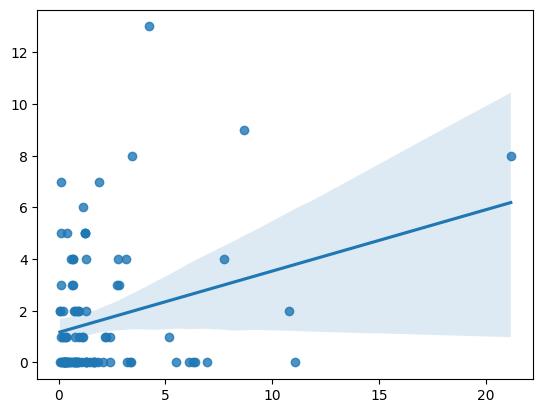

In [83]:
sns.regplot(cab_dat, x='map__gamma', y='hitop_hypsom')

<Axes: >

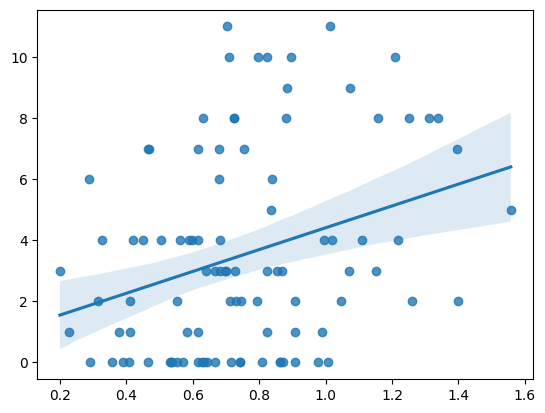

In [62]:
sns.regplot(rdm_dat, x='map__sigma', y='hitop_cogprb')

Text(0.5, 0, 'Flanker Alpha')

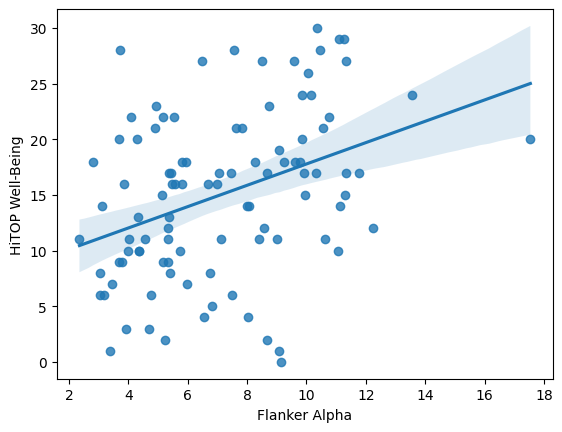

In [24]:
fig, ax = plt.subplots(1)
sns.regplot(flkr_dat, x='map__alpha', y='hitop_welbe', ax=ax)
ax.set_ylabel('HiTOP Well-Being')
ax.set_xlabel('Flanker Alpha')

<Axes: >

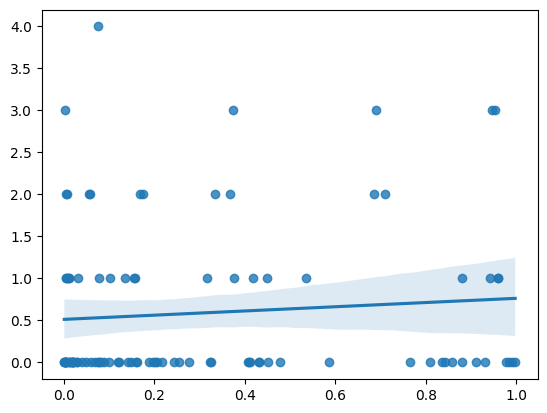

In [44]:
sns.regplot(dat, x='map__alpha', y='todaybaars_hyperactivity')

<Axes: >

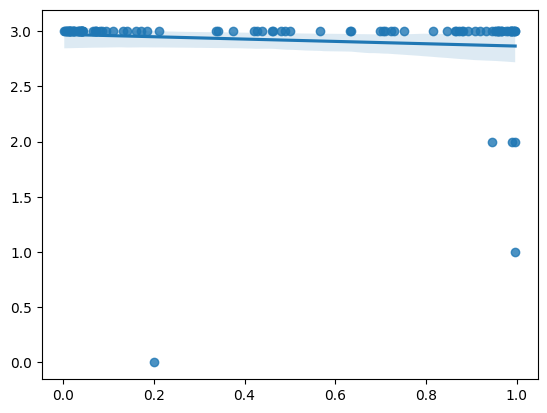

In [45]:
sns.regplot(dat, x='map__gamma_neg', y='todayattn')

In [42]:
flkr_pd.loc[flkr_boot_indexes[:,0]].groupby('sub_id').count()

,survey_date,race__american_indian_alaska_native,race__asian,race__native_hawaiian_or_other_pacific_islander,race__black_or_african_american,race__white,ethnicity__not_hispanic_or_latino,ethnicity__hispanic_or_latino,sex_at_birth__female,sex_at_birth__male,...,max_rhat,map__r,map__p,map__sd0,map__K,map__L,map__thresh,map__alpha,map__t0,tmp_index
sub_id,,,,,,,,,,,,,,,,,,,,,
04rm147ra5yudert1xph02jv,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
09r1f0ufan0oecc5n0bkn8cg,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
108i6ljvfrvl883daukqifw6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3dzah9wtn52kbxgr1v4x6x05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3syjaj2fx9w8fj87yjhu00p7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v7b0ooht69orhmsx0cmseot6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
wf8parcp0dmcgvr5nhmyzlsb,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
xr9zslodjja9hrtawv8prbrp,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [6]:
n_boots = 1000
jobs = []

task='flkr'
flkr_pd = flkr_dat.to_pandas()
flkr_pd['tmp_index'] = flkr_pd.reset_index(names='tmp_index').tmp_index
flkr_boot_indexes = np.array([flkr_pd.groupby('screen_group').tmp_index.sample(frac=1, replace=True).values for bid in range(n_boots)]).T.squeeze()
for tp in flkr_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_boots)(task, tp, ss, flkr_pd, flkr_boot_indexes))
task='cab'
cab_pd = cab_dat.to_pandas()
cab_pd['tmp_index'] = cab_pd.reset_index(names='tmp_index').tmp_index
cab_boot_indexes = np.array([cab_pd.groupby('screen_group').tmp_index.sample(frac=1, replace=True).values for bid in range(n_boots)]).T.squeeze()
for tp in cab_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_boots)(task, tp, ss, cab_pd, cab_boot_indexes))
task='rdm'
rdm_pd = rdm_dat.to_pandas()
rdm_pd['tmp_index'] = rdm_pd.reset_index(names='tmp_index').tmp_index
rdm_boot_indexes = np.array([rdm_pd.groupby('screen_group').tmp_index.sample(frac=1, replace=True).values for bid in range(n_boots)]).T.squeeze()
for tp in rdm_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_boots)(task, tp, ss, rdm_pd, rdm_boot_indexes))
task='bart'
bart_pd = bart_dat.to_pandas()
bart_pd['tmp_index'] = bart_pd.reset_index(names='tmp_index').tmp_index
bart_boot_indexes = np.array([bart_pd.groupby('screen_group').tmp_index.sample(frac=1, replace=True).values for bid in range(n_boots)]).T.squeeze()
for tp in bart_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_boots)(task, tp, ss, bart_pd, bart_boot_indexes))

boot_res = Parallel(n_jobs=10, verbose=10)(jobs)
boot_df = pl.DataFrame(boot_res)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done    5 out of 1140 | elapsed:    4.2s
[Parallel(n_jobs=10)]: Done   12 out of 1140 | elapsed:    6.3s
[Parallel(n_jobs=10)]: Done   21 out of 1140 | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done   30 out of 1140 | elapsed:    8.8s
[Parallel(n_jobs=10)]: Done   41 out of 1140 | elapsed:   12.3s
[Parallel(n_jobs=10)]: Done   52 out of 1140 | elapsed:   14.4s
[Parallel(n_jobs=10)]: Done   65 out of 1140 | elapsed:   16.5s
[Parallel(n_jobs=10)]: Done   78 out of 1140 | elapsed:   18.6s
[Parallel(n_jobs=10)]: Done   93 out of 1140 | elapsed:   22.5s
[Parallel(n_jobs=10)]: Done  108 out of 1140 | elapsed:   24.7s
[Parallel(n_jobs=10)]: Done  125 out of 1140 | elapsed:   28.5s
[Parallel(n_jobs=10)]: Done  142 out of 1140 | elapsed:   32.4s
[Parallel(n_jobs=10)]: Done  161 out of 1140 | elapsed:   36.2s
[Parallel(n_jobs=10)]: Done  180 out of 1140 | elapsed:   38.9s
[Parallel(n_jobs=10)]: Done

In [7]:
boot_df.sort('t')

task,parameter,score,t,full_r2,partial_r2,boot_t_mean,…,boot_t_995,boot_pr2_mean,boot_pr2_std,boot_pr2_005,boot_pr2_025,boot_pr2_975,boot_pr2_995
str,str,str,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64
"""flkr""","""map__alpha""","""todayhitop_anhdep""",-2.497478,0.116315,0.063493,-2.463996,…,-0.631835,0.065764,0.034595,0.004321,0.012677,0.141749,0.174043
"""rdm""","""map__v0""","""todaybaars_sct""",-2.485376,0.170599,0.064901,-2.479989,…,0.014038,0.071461,0.04463,0.000527,0.003054,0.173058,0.202575
"""bart""","""map__alpha""","""hitop_welbe""",-2.404854,0.098503,0.059144,-2.399407,…,0.100038,0.066081,0.045623,0.000092,0.002496,0.172554,0.224842
"""rdm""","""map__sigma_timer""","""hitop_hypsom""",-2.365646,0.310844,0.05916,-2.38498,…,0.002423,0.066188,0.041412,0.000236,0.003332,0.159859,0.185643
"""flkr""","""map__thresh""","""hitop_appls""",-2.324897,0.175766,0.055491,-2.258512,…,-0.423915,0.056926,0.032776,0.002233,0.007069,0.130869,0.151489
"""flkr""","""map__L""","""todayhitop_sepinsec""",-2.317761,0.229699,0.05517,-2.355397,…,0.266182,0.065233,0.046553,0.00004,0.00091,0.170976,0.209215
"""flkr""","""map__alpha""","""todayhitop_appls""",-2.275574,0.159774,0.053286,-2.215659,…,-0.455633,0.054684,0.031356,0.002251,0.007196,0.128499,0.151926
"""rdm""","""map__v0""","""hitop_cogprb""",-2.195367,0.160497,0.051371,-2.244017,…,-0.095827,0.05887,0.036267,0.000233,0.004446,0.144036,0.181415
"""rdm""","""map__w_d""","""todaybaars_impulsivity""",-2.15728,0.106655,0.049692,-2.12482,…,-0.333973,0.052149,0.029154,0.001252,0.005995,0.119204,0.150522


In [8]:
n_perms = 100000
jobs = []

task = 'flkr'
flkr_pd = flkr_dat.to_pandas()
flkr_indexes = flkr_pd.reset_index(names='tmp_index').tmp_index
# in the full dataset I'll worry about permutting within the screening groups, but in the first 100, several of them are too small
flkr_perm_indexes = np.array([flkr_indexes.sample(frac=1).values for pid in range(n_perms)]).T.squeeze()
for tp in flkr_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_perms)(task, tp, ss, flkr_pd, flkr_perm_indexes))
task='cab'
cab_pd = cab_dat.to_pandas()
cab_indexes = cab_pd.reset_index(names='tmp_index').tmp_index
cab_perm_indexes = np.array([cab_indexes.sample(frac=1).values for pid in range(n_perms)]).T.squeeze()
for tp in cab_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_perms)(task, tp, ss, cab_pd, cab_perm_indexes))
task='rdm'
rdm_pd = rdm_dat.to_pandas()
rdm_indexes = rdm_pd.reset_index(names='tmp_index').tmp_index
rdm_perm_indexes = np.array([rdm_indexes.sample(frac=1).values for pid in range(n_perms)]).T.squeeze()
for tp in rdm_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_perms)(task, tp, ss, rdm_pd, rdm_perm_indexes))
task='bart'
bart_pd = bart_dat.to_pandas()
bart_indexes = bart_pd.reset_index(names='tmp_index').tmp_index
bart_perm_indexes = np.array([bart_indexes.sample(frac=1).values for pid in range(n_perms)]).T.squeeze()
for tp in bart_params:
    for ss in all_survey_scores:
        jobs.append(delayed(run_reg_perms)(task, tp, ss, bart_pd, bart_perm_indexes))

res = Parallel(n_jobs=10, verbose=10)(jobs)
res_df = pl.DataFrame(res)
sig, pcor, _, _ = multitest.multipletests(res_df['perm_p'].to_numpy())
res_df = res_df.with_columns(
    hs_perm_p = pl.Series(pcor),
    hs_sig = pl.Series(sig)
)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done    5 out of 1140 | elapsed:    2.9s
[Parallel(n_jobs=10)]: Done   12 out of 1140 | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done   21 out of 1140 | elapsed:    8.5s
[Parallel(n_jobs=10)]: Done   30 out of 1140 | elapsed:    8.6s
[Parallel(n_jobs=10)]: Done   41 out of 1140 | elapsed:   14.1s
[Parallel(n_jobs=10)]: Done   52 out of 1140 | elapsed:   17.0s
[Parallel(n_jobs=10)]: Done   65 out of 1140 | elapsed:   19.8s
[Parallel(n_jobs=10)]: Done   78 out of 1140 | elapsed:   22.8s
[Parallel(n_jobs=10)]: Done   93 out of 1140 | elapsed:   28.4s
[Parallel(n_jobs=10)]: Done  108 out of 1140 | elapsed:   31.3s
[Parallel(n_jobs=10)]: Done  125 out of 1140 | elapsed:   36.9s
[Parallel(n_jobs=10)]: Done  142 out of 1140 | elapsed:   42.6s
[Parallel(n_jobs=10)]: Done  161 out of 1140 | elapsed:   48.2s
[Parallel(n_jobs=10)]: Done  180 out of 1140 | elapsed:   51.5s
[Parallel(n_jobs=10)]: Done

In [9]:
len(res_df)

1140

In [10]:
res_df.sort('perm_p').filter(pl.col('hs_perm_p') < 1)

task,parameter,score,t,full_r2,partial_r2,perm_p,hs_perm_p,hs_sig
str,str,str,f64,f64,f64,f64,f64,bool
"""flkr""","""map__alpha""","""hitop_welbe""",4.200778,0.19604,0.16094,0.00007,0.076701,false
"""bart""","""map__gamma_neg""","""todaybaars_hyperactivity""",3.605174,0.248169,0.123787,0.00042,0.380273,false
"""bart""","""map__alpha""","""todayhitop_anhdep""",3.538291,0.169429,0.119781,0.0006,0.4949,false
"""bart""","""map__alpha""","""todayhitop_appls""",3.566159,0.220267,0.121446,0.00065,0.522544,false
"""bart""","""map__alpha""","""todayhitop_cogprb""",3.149826,0.174585,0.097344,0.00224,0.92172,false
"""bart""","""map__alpha""","""todayhitop""",2.78127,0.189475,0.07756,0.00634,0.999267,false
"""cab""","""map__gamma""","""hitop_hypsom""",3.003318,0.30213,0.091092,0.00702,0.999661,false
"""flkr""","""map__thresh""","""hitop_welbe""",2.70807,0.112572,0.073828,0.00819,0.99991,false
"""rdm""","""map__w_s""","""todaybaars_sct""",2.565911,0.174129,0.068881,0.0133,1.0,false


In [20]:
res_df.sort('perm_p').filter(pl.col('perm_p') < 0.05), 'foo'

(shape: (49, 9)
 ┌──────┬────────────┬────────────┬───────────┬──────────┬───────────┬─────────┬───────────┬────────┐
 │ task ┆ parameter  ┆ score      ┆ t         ┆ full_r2  ┆ partial_r ┆ perm_p  ┆ hs_perm_p ┆ hs_sig │
 │ ---  ┆ ---        ┆ ---        ┆ ---       ┆ ---      ┆ 2         ┆ ---     ┆ ---       ┆ ---    │
 │ str  ┆ str        ┆ str        ┆ f64       ┆ f64      ┆ ---       ┆ f64     ┆ f64       ┆ bool   │
 │      ┆            ┆            ┆           ┆          ┆ f64       ┆         ┆           ┆        │
 ╞══════╪════════════╪════════════╪═══════════╪══════════╪═══════════╪═════════╪═══════════╪════════╡
 │ flkr ┆ map__alpha ┆ hitop_welb ┆ 4.200778  ┆ 0.19604  ┆ 0.16094   ┆ 0.00006 ┆ 0.066114  ┆ false  │
 │      ┆            ┆ e          ┆           ┆          ┆           ┆         ┆           ┆        │
 │ bart ┆ map__gamma ┆ todaybaars ┆ 3.605174  ┆ 0.248169 ┆ 0.123787  ┆ 0.00046 ┆ 0.407886  ┆ false  │
 │      ┆ _neg       ┆ _hyperacti ┆           ┆          ┆        